In [4]:
# Read data files
import my_remote_functions
Input = my_remote_functions.input_data("input_A1.txt")
IMGFile = Input[0]
LIDARFile  = Input[1]
DEMFile = Input[2]
LIDAR_X = float(Input[3])
LIDAR_Y = float(Input[4])
IMG_F = my_remote_functions.file("E:\Matlab_code\data",IMGFile)
LIDAR_F = my_remote_functions.file("E:\Matlab_code\data",LIDARFile)
DEM_F = my_remote_functions.file("E:\Matlab_code\data",DEMFile)

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\Remote_sensing_data\\Test\\input_A1.txt'

In [64]:
# import Lidar data
import numpy as np
als = np.loadtxt(LIDAR_F, dtype=np.float64)
als = als[:,0:3]
print("Als data")
print(als.shape,als.dtype, type(als))

# import Dem data (image)
from osgeo import gdal
Ad = gdal.Open(DEM_F, gdal.GA_ReadOnly)
rd = Ad.GetGeoTransform() # Raster info
print("Dem size is {} x {} x {}".format(Ad.RasterXSize, Ad.RasterYSize, Ad.RasterCount)) # x*y*z,  ad.shape
Ad_band = Ad.GetRasterBand(1) # Intensity type
(ad_min,ad_max) = Ad_band.ComputeRasterMinMax(True) # min,max intensity value" ; # ad.max() or ad.min()
ad = Ad_band.ReadAsArray() 
print(ad.shape, ad.dtype,type(ad))

# import Image
from osgeo import gdal
A = gdal.Open(IMG_F, gdal.GA_ReadOnly)
r = A.GetGeoTransform() # "Raster"
print("Image size is {} x {} x{} ".format(A.RasterXSize,A.RasterYSize,A.RasterCount)) # x*y*z,  ad.shape
if A.RasterCount==1:
    R_band = A.GetRasterBand(1) #"Intensity type"
    ra= R_band.ReadAsArray()
elif A.RasterCount==2:
    R_band = A.GetRasterBand(1) #"Intensity type"
    ra= R_band.ReadAsArray()    
    G_band = A.GetRasterBand(2) #"Intensity type"
    ga= G_band.ReadAsArray() 
else:
    R_band = A.GetRasterBand(1) #"Intensity type"
    ra= R_band.ReadAsArray()    
    G_band = A.GetRasterBand(2) #"Intensity type"
    ga= G_band.ReadAsArray()     
    B_band = A.GetRasterBand(3) #"Intensity type"
    ba= B_band.ReadAsArray() 
    a = np.zeros((A.RasterYSize,A.RasterXSize,A.RasterCount))
    a.shape, ra.shape
    a[:,:,0]= ra
    a[:,:,1]= ga
    a[:,:,2]= ba
    print(a.shape,a.dtype,type(a))

Als data
(19099, 3) float64 <class 'numpy.ndarray'>
Dem size is 151 x 146 x 1
(146, 151) float32 <class 'numpy.ndarray'>
Image size is 548 x 528 x3 
(528, 548, 3) float64 <class 'numpy.ndarray'>


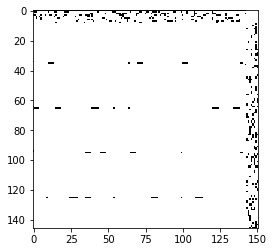

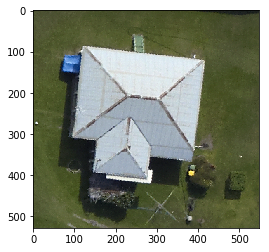

In [65]:
import matplotlib.pyplot as plt
fig=plt.figure()
plt.imshow(ad,cmap=plt.cm.gray)
fig=plt.figure()
plt.imshow(a.astype(int))

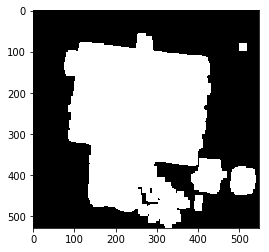

In [66]:
# Height threshold mask and height calculation for als and DEM data
als_P = my_remote_functions.map2pix(rd, als[:,0:2])
#als_map=my_remote_functions.pix2map(rd, als_P)
output= my_remote_functions.dem_als_hc(ad,als,als_P)
ad=output[0] 
ALS=output[1]
ALSP=output[2]
ALSabove= my_remote_functions.alsabove_pt(ALSP) 
Hmask= my_remote_functions.Height(ALS,LIDAR_X,LIDAR_Y,r,a)
import matplotlib.pyplot as plt
fig=plt.figure()
plt.imshow(Hmask, cmap=plt.cm.gray)

Text(0.5, 1.0, 'C DEM gary')

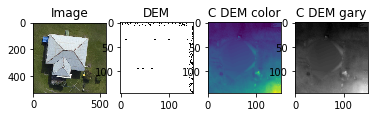

In [67]:
# subploting
from PIL import Image
img1 = np.array(Image.open(IMG_F))
img2 = np.array(Image.open(DEM_F))
import matplotlib.pyplot as plt
fig=plt.figure()
Sb =fig.add_subplot(1,4,1)
plt.imshow(img1)
Sb.set_title('Image')
Sb =fig.add_subplot(1,4,2)
plt.imshow(img2, cmap=plt.cm.gray)
Sb.set_title('DEM')
Sb =fig.add_subplot(1,4,3)
plt.imshow(ad)
Sb.set_title('C DEM color')
Sb =fig.add_subplot(1,4,4)
plt.imshow(ad, cmap=plt.cm.gray)
Sb.set_title('C DEM gary')